#**Mini-boucle 3 - Etude de fonction Green IT**
## Prosit
**Mots clés :**
- Ressources renouvelable
- Capteurs
- Target
- Complexité
- Table de hachage
- Notation de Landau
- Structure de données
- Développement logiciel
- Algorithme

**Contexte :** Le projet vise à maximiser l'efficacité énergétique, à minimiser les coûts et à optimiser l'utilisation des ressources renouvelables.

**Problématique :** Implémenter les deux algorithmes et mesurer leur différences à l'aide de statistique

**Contrainte :**
- Temps
- Ressources
- Utilisation de Python

**Livrable :**
- Notebook
- Diaporama

**Plan d’action :**
- Faire un script force brut
- Faire un script avec hashmap
- Faire des graphiques de comparaison


##Complexité

La complexité permet de mesurer l'efficacité d'un algorithme en se basant sur 2 paramètres : le *temps d'exécution* et l'*espace mémoire* nécessaire qui servent à calculer son coût.

On parle respectivement de **complexité temporelle** et de **complexité spatiale**.



##Green IT

Le Green IT (ou informatique verte) désigne les pratiques visant à réduire l'impact environnemental des technologies du numérique. Il s'agit de rendre l'informatique plus écologique en **réduisant la consommation énergétique**, **prolongeant la durée de vie du matériel** et en **codant de manière sobre**.

*Exemples* : Choisir du matériel consommant peu d'énergie, favoriser la réparation, optimisation du "frontend", etc.

Dans notre cas, pour optimiser l'algorithme, il faudra en utiliser un avec une complexité de **O(n)** et faire par exemple de la surveillance en temps réel des performences et de l'usage du processeur pour identifier les problèmes.

##Algorithme de force brute

In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import glob
import re

Cette algorithme est **O(n²) - Quadratique** : Le temps d'exécution est proportionnel au carré du nombre d'éléments. Si les données double, temps est multiplié par 4.

In [ ]:
def trouver_somme_force_brute(surplus, target):
    for i in range(len(surplus)):
        for j in range(i + 1, len(surplus)):
            if surplus[i] + surplus[j] == target:
                return (surplus[i], surplus[j])
    return None

##Principe de fonctionnement des tables de hachage et leur implémentation sur Python

Une table de hashage est une **structure de données** qui associe des clés à des valeurs. Elle utilise une fonction de hachage pour transformer chaque clé en un index qui permet de retrouver rapidement la valeur associée. Cette méthode permet d'accéder rapidement aux données.

Python permet l'utilisation des tables de hashage nativement grâce aux **Hashmaps**.

Cette algorithme est **O(n) - Linéaire** : Le temps d'exécution est directement proportionnel au nombre d'éléments. Si les données double, le temps double.

In [ ]:
def trouver_somme_dictionnaire(surplus, target):
    valeurs_vues = {}
    for index, valeur in enumerate(surplus):
        complement = target - valeur
        if complement in valeurs_vues:
            return (complement, valeur)
        valeurs_vues[valeur] = index
    return None

In [ ]:
def extract_number(filename):
    match = re.search(r'data_list_(\d+)\.csv', filename)
    if match:
        return int(match.group(1))
    return 0

In [ ]:
all_files = glob.glob("data_list_*.csv")

a = sorted(all_files, key=extract_number)

csv_files_to_process = a[:20]

print("Fichiers à traiter, triés par taille :")
print(csv_files_to_process)
print("-" * 30)

Fichiers à traiter, triés par taille :
['data_list_10.csv', 'data_list_20.csv', 'data_list_30.csv', 'data_list_40.csv', 'data_list_50.csv', 'data_list_75.csv', 'data_list_100.csv', 'data_list_150.csv', 'data_list_200.csv', 'data_list_300.csv', 'data_list_400.csv', 'data_list_500.csv', 'data_list_750.csv', 'data_list_1000.csv', 'data_list_1500.csv', 'data_list_2000.csv', 'data_list_3000.csv', 'data_list_4000.csv', 'data_list_5000.csv', 'data_list_7500.csv']
------------------------------


In [ ]:
target = 35000

all_results = []

for csv_filename in csv_files_to_process:

    print(f"\n--- Traitement du fichier : {csv_filename} ---")

    try:
        df = pd.read_csv(csv_filename)
        surplus = df['Value'].tolist()
        n = len(surplus)
        if n == 0:
            print("Fichier vide, passage au suivant.")
            continue

    except FileNotFoundError:
        print(f"ERREUR: Le fichier {csv_filename} n'a pas été trouvé. Passage au suivant.")
        continue
    except KeyError:
        print(f"ERREUR: La colonne 'Value' n'existe pas dans {csv_filename}. Passage au suivant.")
        continue
    except Exception as e:
        print(f"ERREUR inattendue: {e}. Passage au suivant.")
        continue

    start_time = time.time()
    result_brute_force = trouver_somme_force_brute(surplus, target)
    end_time = time.time()
    time_brute_force = end_time - start_time
    print(f"Brute Force Result: {result_brute_force}, Time: {time_brute_force:.4f} seconds")
    all_results.append({'file': csv_filename, 'method': 'Brute Force', 'time': time_brute_force, 'size': n})

    start_time = time.time()
    result_dict = trouver_somme_dictionnaire(surplus, target)
    end_time = time.time()
    time_dict = end_time - start_time
    print(f"Dictionary Result: {result_dict}, Time: {time_dict:.4f} seconds")
    all_results.append({'file': csv_filename, 'method': 'Dictionary', 'time': time_dict, 'size': n})


--- Traitement du fichier : data_list_10.csv ---
Brute Force Result: None, Time: 0.0000 seconds
Dictionary Result: None, Time: 0.0000 seconds

--- Traitement du fichier : data_list_20.csv ---
Brute Force Result: None, Time: 0.0000 seconds
Dictionary Result: None, Time: 0.0000 seconds

--- Traitement du fichier : data_list_30.csv ---
Brute Force Result: None, Time: 0.0000 seconds
Dictionary Result: None, Time: 0.0000 seconds

--- Traitement du fichier : data_list_40.csv ---
Brute Force Result: None, Time: 0.0001 seconds
Dictionary Result: None, Time: 0.0000 seconds

--- Traitement du fichier : data_list_50.csv ---
Brute Force Result: None, Time: 0.0001 seconds
Dictionary Result: None, Time: 0.0000 seconds

--- Traitement du fichier : data_list_75.csv ---
Brute Force Result: None, Time: 0.0002 seconds
Dictionary Result: None, Time: 0.0000 seconds

--- Traitement du fichier : data_list_100.csv ---
Brute Force Result: None, Time: 0.0003 seconds
Dictionary Result: None, Time: 0.0000 second

Affichage du graphique 1: Temps par Fichier (log)


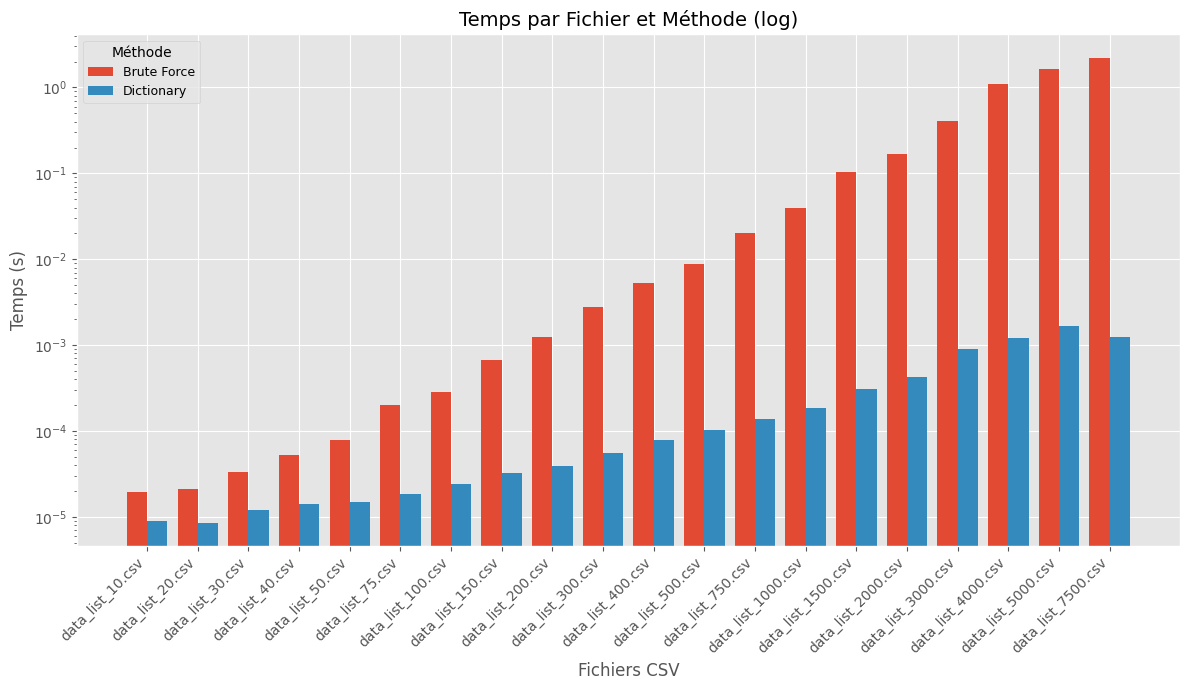

Affichage du graphique 2: Scalabilité (log-log)


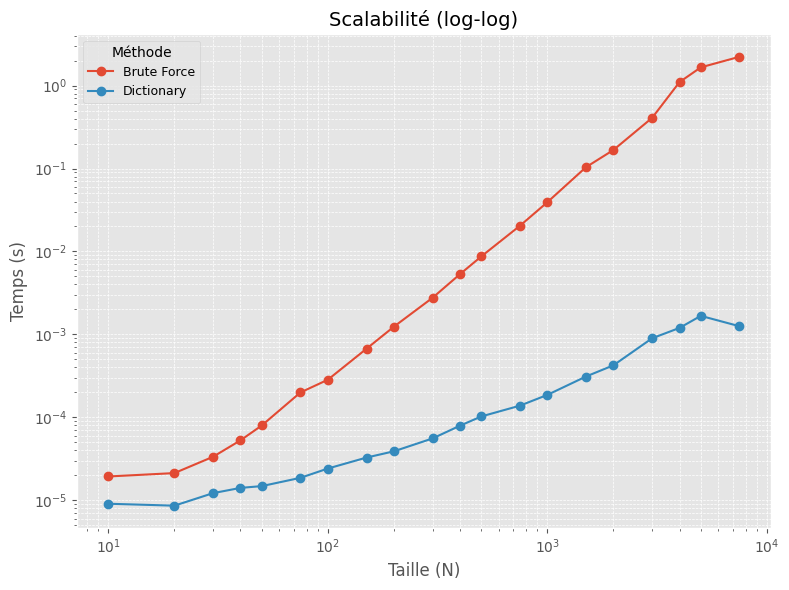


--- Analyse terminée. 2 graphiques ont été affichés. ---


In [ ]:
plt.style.use('ggplot')

if not all_results:
    print("Aucun résultat n'a été collecté. Impossible de générer les graphiques.")
else:
    df_results = pd.DataFrame(all_results)
    df_results.sort_values('size', inplace=True)

    files = df_results['file'].unique()
    methods = df_results['method'].unique()

    # === GRAPHIQUE 1: Temps par Fichier (Barres) ===
    print("Affichage du graphique 1: Temps par Fichier (log)")
    plt.figure(figsize=(12, 7))
    ax = plt.gca()

    bar_width = 0.8 / len(methods)
    x = range(len(files))

    for i, method in enumerate(methods):
        subset = df_results[df_results['method'] == method]
        ax.bar(
            [pos + i * bar_width for pos in x],
            subset['time'],
            bar_width,
            label=method
        )

    ax.set_title("Temps par Fichier et Méthode (log)", fontsize=14)
    ax.set_ylabel("Temps (s)", fontsize=12)
    ax.set_xlabel("Fichiers CSV", fontsize=12)
    ax.set_yscale("log")
    ax.set_xticks([pos + bar_width * (len(methods) - 1) / 2 for pos in x])
    ax.set_xticklabels(files, rotation=45, ha='right')
    ax.legend(title='Méthode', fontsize=9)

    plt.tight_layout()
    plt.show()

    # === GRAPHIQUE 2: Scalabilité (log-log) ===
    print("Affichage du graphique 2: Scalabilité (log-log)")
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    for method in methods:
        subset = df_results[df_results['method'] == method]
        ax.plot(subset['size'], subset['time'], marker='o', label=method)

    ax.set_title("Scalabilité (log-log)", fontsize=14)
    ax.set_xlabel("Taille (N)", fontsize=12)
    ax.set_ylabel("Temps (s)", fontsize=12)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid(True, which="both", ls="--", linewidth=0.5)
    ax.legend(title='Méthode', fontsize=9)

    plt.tight_layout()
    plt.show()


print("\n--- Analyse terminée. 2 graphiques ont été affichés. ---")

##Conclusion

L'algorithme **O(n)** est le plus efficace par rapport au **O(n²)** pour le traitement d'un volume important de données en temps réel.